In [570]:
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import TruncatedSVD

from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt

# Let's have a look at the messages

In [4]:
pd.set_option('display.max_colwidth', -1)

In [3]:
df = pd.read_csv("HelloFromEarth_messages.csv")

In [5]:
df.head()

,Location,Message,Name,City,Country
0,"Sydney, Australia","I'd like to know what music you listen to...? (if music exists where you are?). Earth has some pretty awesome music, you should come listen!",Kiara,Sydney,Australia
1,"Canberra, Australia",Hello from Australia on the planet we call Earth. These messages express our people's dreams for the future. We want to share those dreams with you.,Minister Kim Carr,Canberra,Australia
2,"Canberra, Australia","Our observations indicate that your planetary system is a low-mass star orbited by at least four planets, can you confirm?",Professor Penny Sackett,Canberra,Australia
3,"Melbourne, Australia",Always look on the bright side of life...,Adrian Sayle,Melbourne,Australia
4,"Ballarat, Australia",Hello! Directly following this message is a nuclear warhead! Only joking!!!,Josh,Ballarat,Australia


# Time to clean 'em up

In [567]:
def remove_stopwords_punc(text):
    # lower
    text=text.lower()
    # remove numbers
    text=re.sub("\d+", " ", text)
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(text)
    
    # a list of words
    stop_words='english'
    filtered_sentence = [w for w in word_tokens if w not in stop_words] 

    filtered_sentence = [] 
    
    # remove stop words
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
            
    # lemmatize
    lemma = nltk.wordnet.WordNetLemmatizer()    
    final = []
    for w in filtered_sentence:
        stem = lemma.lemmatize(w)
        final.append(stem)
         
    return final

Let's test it out:

In [568]:
test ='you read this arrived message now.\ntrue = true. loves loves loves false = false. true != false. false != true.\n... -2 -1 0 1 2 3 4 5 6 7 8 9 10 11 12 ....'

In [569]:
remove_stopwords_punc(test)

['you',
 'read',
 'this',
 'arrived',
 'message',
 'now',
 'true',
 'true',
 'love',
 'love',
 'love',
 'false',
 'false',
 'true',
 'false',
 'false',
 'true']

# Vectorizing

In [219]:
tfidf = TfidfVectorizer(tokenizer=remove_stopwords_punc,
                             stop_words='english')

vectors = tfidf.fit_transform(df.Message)
words_df = pd.DataFrame(vectors.toarray(), columns=tfidf.get_feature_names())
words_df.head()

/Users/amyokruk/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,_,__,___,_____,__________________pizza_______________,__o,_v,aa,aaa,aaaaa,...,π,πad,вo,н,о,тв,ღ,你好,葛利斯,ｍaybe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [538]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function remove_stopwords_punc at 0x20605b0d0>,
                use_idf=True, vocabulary=None)

In [222]:
tfs_reduced = TruncatedSVD(n_components=395, random_state=0).fit_transform(words_df)

In [223]:
tfs_reduced

array([[ 0.12412267, -0.03599048,  0.01400662, ..., -0.01730601,
         0.01957814,  0.00362261],
       [ 0.24218272,  0.0944447 , -0.02275504, ...,  0.01329476,
         0.00916384,  0.00403114],
       [ 0.03840202,  0.00106063,  0.0098045 , ..., -0.00918452,
        -0.00286848, -0.01384037],
       ...,
       [ 0.11834538, -0.01363395, -0.01040417, ..., -0.02113247,
        -0.02913515, -0.00792409],
       [ 0.03816174, -0.02361915, -0.05521883, ...,  0.01932012,
        -0.00596646,  0.02836013],
       [ 0.11944333,  0.09992823, -0.01700175, ..., -0.00295293,
        -0.00510745, -0.00405865]])

# TSNE clustering

In [224]:
model = TSNE(n_components=2, 
             perplexity=100, 
             verbose=2, 
             method='exact').fit_transform(tfs_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 10600
[t-SNE] Computed conditional probabilities for sample 2000 / 10600
[t-SNE] Computed conditional probabilities for sample 3000 / 10600
[t-SNE] Computed conditional probabilities for sample 4000 / 10600
[t-SNE] Computed conditional probabilities for sample 5000 / 10600
[t-SNE] Computed conditional probabilities for sample 6000 / 10600
[t-SNE] Computed conditional probabilities for sample 7000 / 10600
[t-SNE] Computed conditional probabilities for sample 8000 / 10600
[t-SNE] Computed conditional probabilities for sample 9000 / 10600
[t-SNE] Computed conditional probabilities for sample 10000 / 10600
[t-SNE] Computed conditional probabilities for sample 10600 / 10600
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 50: error = 81.0644925, gradient norm = 0.0578281 (50 iterations in 236.071s)
[t-SNE] Iteration 100: error = 80.8404381, gradient norm = 0.0361343 (50 iterations in 230.329s)

In [229]:
model

array([[-53.370377 ,   3.434243 ],
       [ 62.00682  ,  24.743813 ],
       [  9.689409 ,  18.373215 ],
       ...,
       [ 30.123129 ,   0.9117946],
       [  5.694586 , -10.191452 ],
       [ 33.54263  ,  23.117132 ]], dtype=float32)

# Getting those sweet, sweet coordinates

In [230]:
x_axis=model[:,0]
y_axis=model[:,1]
x_norm = (x_axis-np.min(x_axis)) / (np.max(x_axis) - np.min(x_axis))
y_norm = (y_axis-np.min(y_axis)) / (np.max(y_axis) - np.min(y_axis))

data = {"x":x_norm.tolist(), "y":y_norm.tolist()}

In [264]:
coords_df = pd.DataFrame(data)

In [534]:
coords_df.head()

,x,y
0,0.202228,0.499307
1,0.891644,0.622031
2,0.579030,0.585342
3,0.454816,0.409091
4,0.414241,0.516976


# Getting ready to join our coordinates to the messages dataframe

First, let's do some analysis to see what people talk about when they talk to aliens. This way we can tag some messages to get a better idea of how the algorithm is clustering things

In [ ]:
# Key words:
#     Do people say hello? 
#         (hello, hi, greetings, )
#     Do we come in peace? 
#         (peace, hope, welcome, prosperity, love, enjoy, friends)
#     Are we polite? 
#         (positive message analysis or *politeness* analysis)
#     Visit: 
#         (visit, come, invite, welcome, join us, meet)
#     Are you out there? 
#         (exist, reply, let me know, let us know, wonder,  contact us,
#         anybody, out there, alone, answer, signal, seek, call, get here)
#     Anxiety: 
#         (help, help us, destroy, mistake, hurt)
        

In [275]:
df_mining = df

In [281]:
df_mining.Message = df_mining.Message.str.lower()

In [ ]:
# anxiety = help, help us, destroy, mistake, hurt, climate change, global warming, environmental crisis
climate change = climate change, global warming, environmental crisis, destroying, destroy

In [305]:
df_mining.Message.str.contains('destroy').value_counts()

False    10475
True     125  
Name: Message, dtype: int64

In [317]:
df_mining.Message.str.contains('destroy|climate|global warming|crisis|hurt|help|mistake').value_counts()

False    9992
True     608 
Name: Message, dtype: int64

In [362]:
df_mining['Peace']=df_mining.Message.str.contains('peace|hope|welcome|prosperity|love|enjoy|friends').astype(int)


In [710]:
df_mining['Anxiety']=df_mining.Message.str.contains('destroy|climate|global warming|crisis|hurt|help|mistake|save|pollution|kill').astype(int)


In [369]:
df_mining['Visit']=df_mining.Message.str.contains('visit|come|invite|welcome|join us|meet').astype(int)


In [547]:
df_mining['Sign']=df_mining.Message.str.contains('exist|reply|contact us|alone|answer|signal|call').astype(int)

It worked!

In [711]:
df_mining.sample(10)

,Location,Message,Name,City,Country,Anxiety,Peace,Visit,Sign
545,"Sydney, Australia","greetings from the earth, 3rd planet of the sol system. by our warmth and empathy, humanity hopes for a better future for all creatures of the universe.",Michael,Sydney,Australia,0,1,0,0
10440,"Sidny, Australia","hello from earth!\ni would like help to live, beacuse i like to live. life is fun!",BlackWiddow,Sidny,Australia,1,0,0,0
175,"Melbourne, Australia","help us. we are very young and we want to know. when you arrive, let me show you what it means to be human.",Sean Walker,Melbourne,Australia,1,0,0,0
9062,"Laramie, WY, United States","by the time you receive this and come down for a visit, i will be long gone. tell my descendants i say hi and have a drink to my memory. cheers!",stephanie,"Laramie, WY",United States,0,0,1,0
6250,"Mendoza, Argentina",hello friends! we want to know when are you coming to this planet. we really want to meet you to share acknolage and experiences.\nwe`re looking forward for you,Agustin,Mendoza,Argentina,0,1,1,0
5022,"Budapest, Hungary","i was here 20 years ago. world is a breaking mirror, falling pieces mixed and creating a new order. in it you can see your reflection and that you are the same.",nextman,Budapest,Hungary,0,0,0,0
412,"Sydney, Australia","e=mc2 3.14159 2,3,5,7,11,13,17,19,23,29,31",Stuart Dyer,Sydney,Australia,0,0,0,0
8698,"Siegen, Germany","hi there! we earthlings are strange, but well capable of learning. sometimes we really mess things up, so a helping alien hand might be nice someday. :-)",Tim,Siegen,Germany,1,0,0,0
962,"Melbourne, Australia",may you live in peace and prosperity. to live is the best gift in the universe. do not take what you cannot give. respect all life. be in awe of the vastness.,Geoffrey Irvin,Melbourne,Australia,0,1,0,0
5527,"Bandar Menjalara , Malaysia","hello,whats your name?you can call me ajinomoto.i hope we can be friands.you know,i love to see japenese cartoon,ihope i can share with you.well then,bye~~",Ajinomoto,Bandar Menjalara,Malaysia,0,1,0,1


# Merging the dataframes

I want to colour messages based on their sentiment 

In [712]:
df_merged = df_mining.merge(coords_df, left_index=True, right_index=True)

In [713]:
df_merged.duplicated().value_counts()

False    10312
True     288  
dtype: int64

In [714]:
df_merged = df_merged.drop_duplicates()

In [715]:
df_merged.duplicated().value_counts()

False    10312
dtype: int64

In [716]:
# colour_map = {1:'#000000', 0:'#ffffff'}
# df_merged = df_merged.replace({"Anxiety": colour_map})
# #f90be8

In [717]:
colour_map = {1:'#f90be8', 0:'#ffffff'}
df_merged = df_merged.replace({"Anxiety": colour_map})

In [718]:
df_merged.head()

,Location,Message,Name,City,Country,Anxiety,Peace,Visit,Sign,x,y
0,"Sydney, Australia","i'd like to know what music you listen to...? (if music exists where you are?). earth has some pretty awesome music, you should come listen!",Kiara,Sydney,Australia,#ffffff,0,1,1,0.202228,0.499307
1,"Canberra, Australia",hello from australia on the planet we call earth. these messages express our people's dreams for the future. we want to share those dreams with you.,Minister Kim Carr,Canberra,Australia,#ffffff,0,0,1,0.891644,0.622031
2,"Canberra, Australia","our observations indicate that your planetary system is a low-mass star orbited by at least four planets, can you confirm?",Professor Penny Sackett,Canberra,Australia,#ffffff,0,0,0,0.579030,0.585342
3,"Melbourne, Australia",always look on the bright side of life...,Adrian Sayle,Melbourne,Australia,#ffffff,0,0,0,0.454816,0.409091
4,"Ballarat, Australia",hello! directly following this message is a nuclear warhead! only joking!!!,Josh,Ballarat,Australia,#ffffff,0,0,0,0.414241,0.516976


# Time to vizualize!

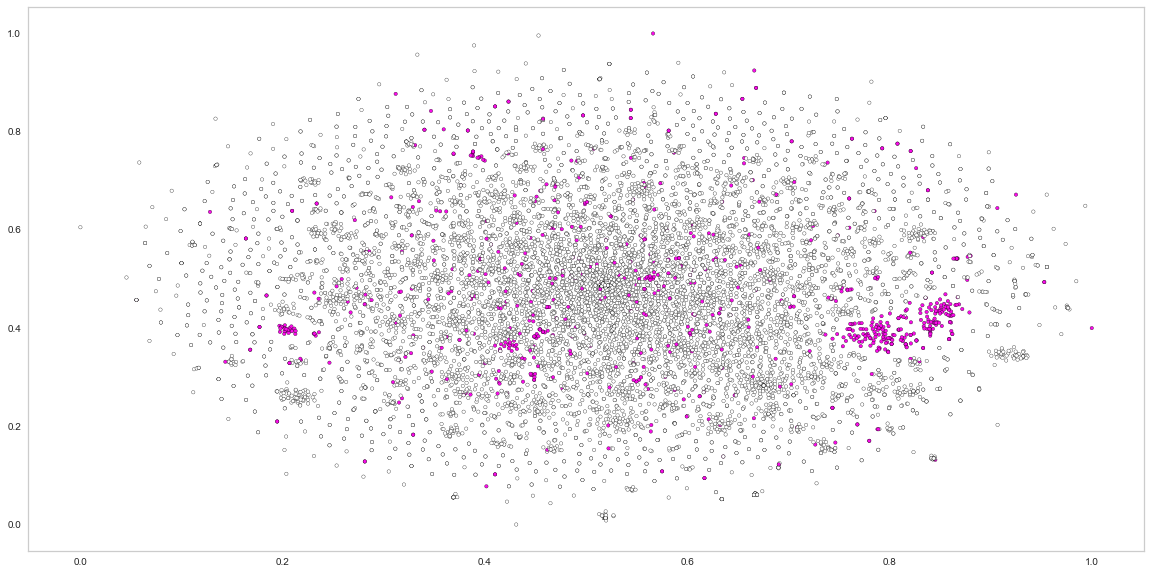

In [719]:
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(20, 10))
# ax = matplotlib.pyplot.scatter(data=df_merged, x='x',y='y', s=12, edgecolors='#000000', color='Anxiety')
ax = matplotlib.pyplot.scatter(data=df_merged, x='x',y='y', s=12, edgecolors='#000000', color='Anxiety')
plt.grid(b=None)


# Investigating the clusters

In [521]:
test = df_merged[(df_merged.x >= 0.51) & (df_merged.x <= 0.53)]

In [522]:
test2 = test[(test.y >= 0.48) & (test.y <= 0.5)]

In [523]:
test2.shape

(156, 11)

In [545]:
test2.head()

,Location,Message,Name,City,Country,Anxiety,Peace,Visit,Sign,x,y
53,"Perth, Australia",0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765,Steven Draper,Perth,Australia,#ffffff,0,0,NaN,0.512529,0.488924
68,"Adelaide, Australia",2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 101,Sam,Adelaide,Australia,#ffffff,0,0,NaN,0.522895,0.492505
81,"Sydney, Australia",2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 101 103 107 109 113 127 131 137 139 149 151 157 163 167 173 179 181 191 193 197 199 211,Scott,Sydney,Australia,#ffffff,0,0,NaN,0.511601,0.489277
131,"sydney, Australia",we know your planet is five times the mass of ours. what is your physical body mass (if you have a physical body)? how do you sense your environment? send pix!,oznick,sydney,Australia,#ffffff,0,0,NaN,0.516645,0.481918
150,"Adelaide, Australia","to afl fans on gliese581d, coco's afl footy tips for round 20 are hawthorn,collingwood,westcoast,brisbane,sydney,fremantle,portadelaide,stkilda.love,coco.",Coco,Adelaide,Australia,#ffffff,1,0,NaN,0.519067,0.481221


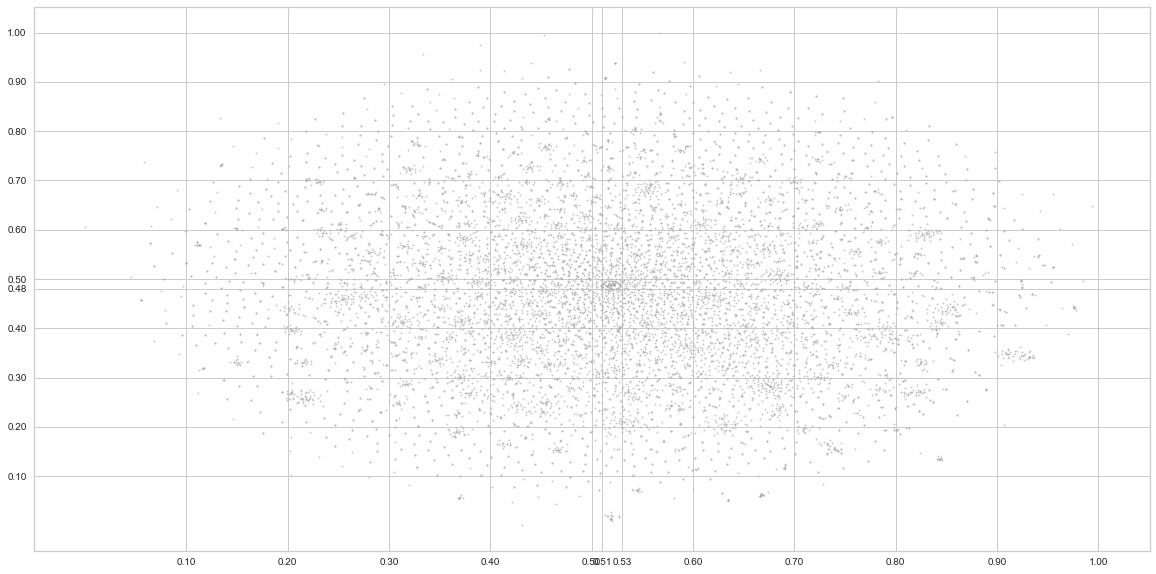

In [543]:
# plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

plt.figure(figsize=(20, 10))
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.51,0.53,0.6,0.7,0.8,0.9,1.0])
plt.yticks([0.1,0.2,0.3,0.4,0.48,0.5,0.6,0.7,0.8,0.9,1.0])
ax = matplotlib.pyplot.scatter(data=df_merged, x='x',y='y', s=2, color='#b2b2b2', alpha=0.7)

# yticks(0:1:0.1)

# Let's do a version where we throw out the trash messages

In [571]:
df_merged.head()

,Location,Message,Name,City,Country,Anxiety,Peace,Visit,Sign,x,y
0,"Sydney, Australia","i'd like to know what music you listen to...? (if music exists where you are?). earth has some pretty awesome music, you should come listen!",Kiara,Sydney,Australia,0,0,1,#f90be8,0.202228,0.499307
1,"Canberra, Australia",hello from australia on the planet we call earth. these messages express our people's dreams for the future. we want to share those dreams with you.,Minister Kim Carr,Canberra,Australia,0,0,0,#f90be8,0.891644,0.622031
2,"Canberra, Australia","our observations indicate that your planetary system is a low-mass star orbited by at least four planets, can you confirm?",Professor Penny Sackett,Canberra,Australia,0,0,0,#ffffff,0.579030,0.585342
3,"Melbourne, Australia",always look on the bright side of life...,Adrian Sayle,Melbourne,Australia,0,0,0,#ffffff,0.454816,0.409091
4,"Ballarat, Australia",hello! directly following this message is a nuclear warhead! only joking!!!,Josh,Ballarat,Australia,0,0,0,#ffffff,0.414241,0.516976


In [588]:
# def tester2(text):
#     # lower
#     text=text.lower()
#     # remove punctuation
#     tokenizer = RegexpTokenizer(r'\w+')
#     word_tokens = tokenizer.tokenize(text)
           
#     # lemmatize
#     lemma = nltk.wordnet.WordNetLemmatizer()    
#     final = []
#     for w in word_tokens:
#         stem = lemma.lemmatize(w)
#         final.append(stem)
         
#     return final

In [635]:
def basic_tokenizier(text):
    # lower
    text=text.lower()
    # remove punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(text)
    return len(word_tokens)

In [636]:
def trash_tokenizier(text):
    # lower
    text=text.lower()
    # remove numbers
    text=re.sub("\d+", " ", text)
    # remove punc
    text  = "".join([char for char in text if char not in string.punctuation])
    # extract words
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(text)
    # lemmatize
    lemma = nltk.wordnet.WordNetLemmatizer()    
    final = []
    for w in word_tokens:
        stem = lemma.lemmatize(w)
        final.append(stem)
    
    return len(word_tokens)

In [615]:
test

'you read !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ this arrived message now.\ntrue = true. loves loves loves false = false. true != false. false != true.\n... -2 -1 0 1 2 3 4 5 6 7 8 9 10 11 12 ....'

In [637]:
trash_tokenizier(test)

17

In [638]:
basic_tokenizier(test)

33

In [639]:
df_merged['basic_tokens']=df_merged.Message.apply(basic_tokenizier)

In [640]:
df_merged['cleaned_tokens']=df_merged.Message.apply(trash_tokenizier)

In [693]:
df_merged['percent_change']= ((df_merged['basic_tokens'] - df_merged['cleaned_tokens']) / df_merged['basic_tokens']) *100

In [694]:
df_merged.sample(1)

,Location,Message,Name,City,Country,Anxiety,Peace,Visit,Sign,x,y,basic_tokens,cleaned_tokens,token_ratio,percent_change
3192,"Chino Hills, United States",may your society choose peace over economy. for we may not even exist when you read this. we have the technology to fix our earth but it would cost 2 much. help,Allen,Chino Hills,United States,1,1,0,#f90be8,0.448636,0.295028,32,31,3.125,3.125


In [669]:
len(df_merged[df_merged['token_ratio'] <= 50])

10421

In [695]:
df_30_cleaned = (df_merged[df_merged['percent_change'] <= 30])

In [696]:
df_20_cleaned = (df_merged[df_merged['percent_change'] <= 20])

In [699]:
len(df_merged)

10600

In [697]:
len(df_20_cleaned)

9929

In [698]:
len(df_30_cleaned)

10275

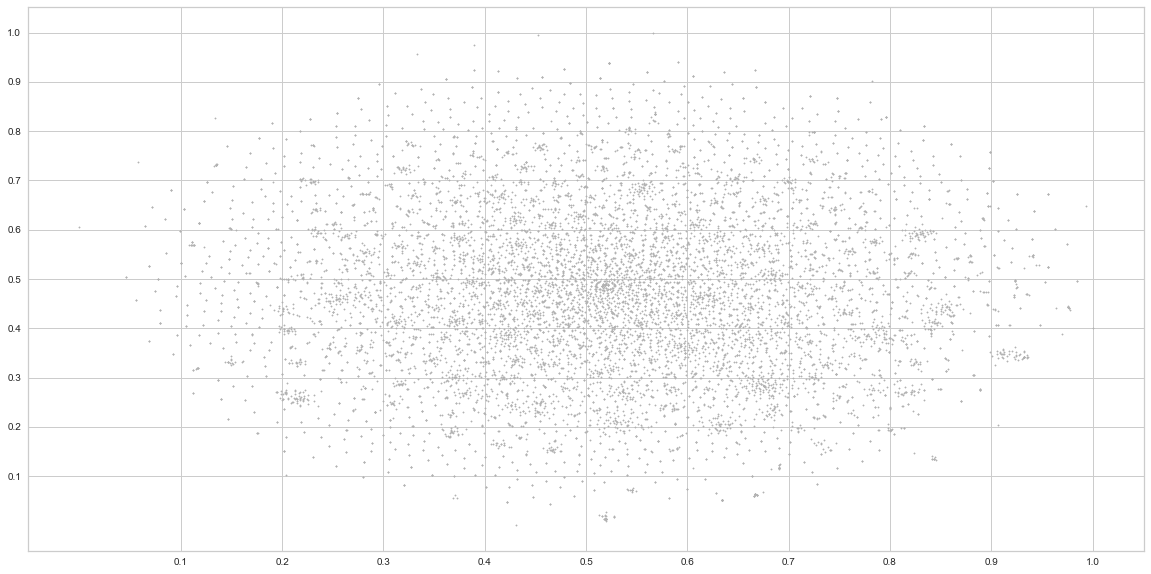

In [700]:
plt.figure(figsize=(20, 10))
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax = matplotlib.pyplot.scatter(data=df_20_cleaned, x='x',y='y', s=2, color='#b2b2b2')

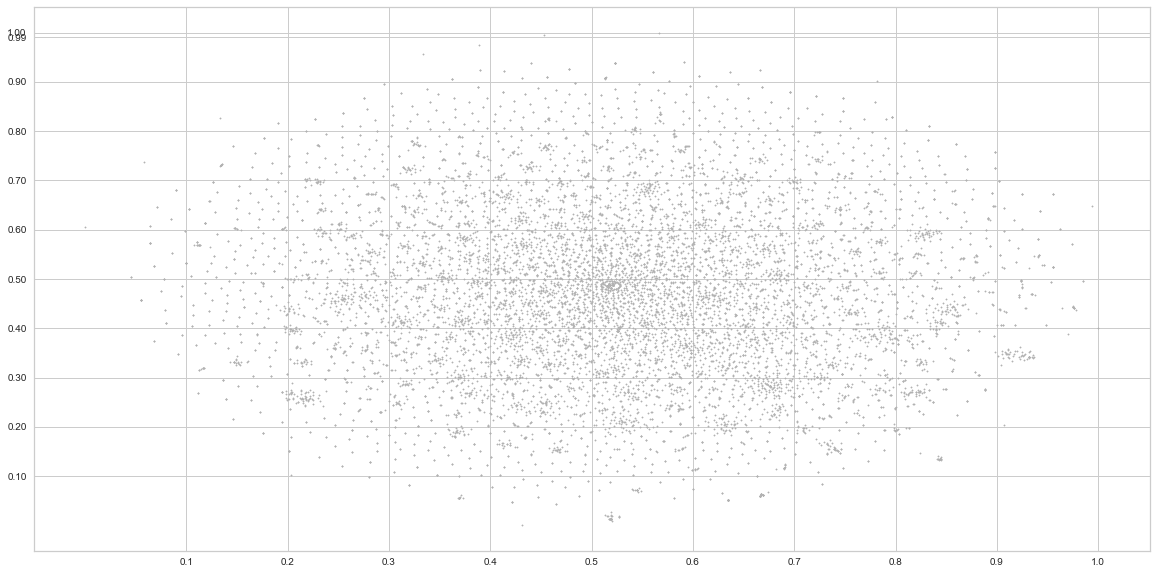

In [708]:
plt.figure(figsize=(20, 10))
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1.0])
ax = matplotlib.pyplot.scatter(data=df_merged, x='x',y='y', s=2, color='#b2b2b2')

In [709]:
df_20_cleaned[(df_20_cleaned.y >= 0.99)]

,Location,Message,Name,City,Country,Anxiety,Peace,Visit,Sign,x,y,basic_tokens,cleaned_tokens,token_ratio,percent_change
2067,"Itajai, Australia",we kill our own race and have transformed our beautiful and green planet in polution. stay away/save ur life and go to next galaxy. there's not intelligent here,Susana,Itajai,Australia,1,0,0,#ffffff,0.566209,1.000000,30,28,6.666667,6.666667
9635,"QingDao, China","i believe that the existence of you and hope you have a chance to communicate, exchange, and to establish friendship with you. \nnina\nqingdao,china",Nina,QingDao,China,0,1,0,#f90be8,0.452972,0.995834,25,24,4.000000,4.000000


In [702]:
clean = df_20_cleaned[(df_20_cleaned.x >= 0.51) & (df_20_cleaned.x <= 0.53)]
clean2 = clean[(clean.y >= 0.48) & (clean.y <= 0.5)]

In [704]:
clean2.shape

(60, 15)

In [706]:
clean2

,Location,Message,Name,City,Country,Anxiety,Peace,Visit,Sign,x,y,basic_tokens,cleaned_tokens,token_ratio,percent_change
131,"sydney, Australia",we know your planet is five times the mass of ours. what is your physical body mass (if you have a physical body)? how do you sense your environment? send pix!,oznick,sydney,Australia,0,0,0,#ffffff,0.516645,0.481918,31,31,0.000000,0.000000
262,"Sydney, Australia",greetingsfromlaurajamesrickelizabethandgeorgeandrew,George Andrew,Sydney,Australia,0,0,0,#ffffff,0.526264,0.481929,1,1,0.000000,0.000000
278,"Sydney, Australia","bleep blip, bleep bleep blip, buzz, click",Chris,Sydney,Australia,0,0,0,#ffffff,0.518517,0.495786,7,7,0.000000,0.000000
287,"Los Angeles, United States",human â™¥ $ â˜º,Nicolas,Los Angeles,United States,0,0,0,#ffffff,0.517678,0.487141,4,4,0.000000,0.000000
321,"Sydney, Australia","dear aliens,\n\ndo you understand the various pop-cultural allusions within these messages? its certainly going to make translation a slog.\n\ncheers,\n\njacqui",Jacqui,Sydney,Australia,0,0,0,#ffffff,0.518468,0.487556,23,22,4.347826,4.347826
444,"Sydney, Australia","heads up: on our planet, it is considered rude to introduce yourself to new neighbours without offering delicious cake or a hamper of edible goods.",Tegan Lyons,Sydney,Australia,0,0,0,#ffffff,0.519982,0.490009,25,25,0.000000,0.000000
483,"Sydney, Australia",we are here.,CS,Sydney,Australia,0,0,0,#ffffff,0.515404,0.485424,3,3,0.000000,0.000000
1010,"Düsseldorf, Australia",ack ack ack ack-ack!,Seth at tsubakadotcom,Düsseldorf,Australia,0,0,0,#ffffff,0.527859,0.484891,5,4,20.000000,20.000000
1134,"Sydney, Australia",puddycat goes meh! meeeeow,Puddycat,Sydney,Australia,0,0,0,#ffffff,0.522588,0.495216,4,4,0.000000,0.000000
1198,"sydney, Australia",hellofromcarolenormanstevenand tugbafromaustraliafromsydney,tugba,sydney,Australia,0,0,0,#ffffff,0.525165,0.492929,2,2,0.000000,0.000000
